## **Q1**
Importing neccesary libraries and loading the dataset


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


In [ ]:
# Load the Asia Dataset
asia_df = pd.read_excel('/content/Asia+Dataset.xlsx')
print(asia_df.head())  # Display the first few rows of the dataset


   RANK          COMPNAME COUNTRY    MAIN Business    SALES1  SALES2  SALES3  \
0     1      ITOCHU CORP.   JAPAN  General trading  155976.9    -1.2       1   
1     2      MITSUI & CO.   JAPAN  General trading  147571.8    -4.9       2   
2     3    SUMITOMO CORP.   JAPAN  General trading  143131.9    -2.7       3   
3     4    MARUBENI CORP.   JAPAN  General trading  140606.1    -5.2       4   
4     5  MITSUBISHI CORP.   JAPAN  General trading  135136.9    -2.2       5   

   NETPROF1  NETPROF2  NETPROF3  ...  EQUITY1  EQUITY2  EMPLOY1  EMPLOY2  \
0     92.30     368.8     232.0  ...   3953.8     79.0   7345.0    280.0   
1    213.20      42.9     109.0  ...   5587.0     49.0   8341.0    253.0   
2      1.18       1.8     182.0  ...   6148.5     38.0   6491.0    314.0   
3     75.60       2.3     280.0  ...   4546.6     68.0   7064.0    292.0   
4    156.30     400.9     144.0  ...   5624.7     48.0   9916.0    218.0   

   PROFPER  MARKTCAP  PROFTAS1  PROFTAS2  PROFTAS3  NOTES  
0 

In [ ]:
# Check the column names of the Asia dataset
print(asia_df.columns)



Index(['RANK', 'COMPNAME', 'COUNTRY', 'MAIN Business', 'SALES1', 'SALES2',
       'SALES3', 'NETPROF1', 'NETPROF2', 'NETPROF3', 'ASSETS1', 'ASSETS2',
       'SALEPER1', 'EQUITY1', 'EQUITY2', 'EMPLOY1', 'EMPLOY2', 'PROFPER',
       'MARKTCAP', 'PROFTAS1', 'PROFTAS2', 'PROFTAS3', 'NOTES'],
      dtype='object')


In [ ]:
# Correct column names to exclude
exclude_columns = ['RANK', 'COMPNAME', 'COUNTRY', 'MAIN Business', 'NOTES']

# Exclude the columns specified in the instructions
asia_df = asia_df.drop(columns=exclude_columns)

# Impute missing values using MICE method
imputer = IterativeImputer(max_iter=10, random_state=0)
asia_df_imputed = imputer.fit_transform(asia_df)

# Convert the imputed data into a DataFrame
asia_df_imputed = pd.DataFrame(asia_df_imputed, columns=asia_df.columns)
print(asia_df_imputed.head())  # Check the imputed dataset


     SALES1  SALES2  SALES3  NETPROF1  NETPROF2  NETPROF3  ASSETS1  ASSETS2  \
0  155976.9    -1.2     1.0     92.30     368.8     232.0  42171.2     12.0   
1  147571.8    -4.9     2.0    213.20      42.9     109.0  53233.1      9.0   
2  143131.9    -2.7     3.0      1.18       1.8     182.0  36316.0     16.0   
3  140606.1    -5.2     4.0     75.60       2.3     280.0  38473.3     15.0   
4  135136.9    -2.2     5.0    156.30     400.9     144.0  61025.3      6.0   

   SALEPER1  EQUITY1  EQUITY2  EMPLOY1  EMPLOY2  PROFPER  MARKTCAP  PROFTAS1  \
0      3.70   3953.8     79.0   7345.0    280.0  12569.0    8461.5       0.1   
1      2.77   5587.0     49.0   8341.0    253.0  25564.0   12378.8       0.1   
2      3.94   6148.5     38.0   6491.0    314.0  18182.0    9695.4       0.1   
3      3.65   4546.6     68.0   7064.0    292.0  10698.0    7286.3       0.1   
4      2.21   5624.7     48.0   9916.0    218.0  15765.0   17344.0       0.1   

   PROFTAS2  PROFTAS3  
0       0.2       2.

In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
asia_df_scaled = scaler.fit_transform(asia_df_imputed)

# Show the first 5 rows of the scaled data
print(asia_df_scaled[:5])


[[ 1.26646598e+01 -4.81986597e-01 -1.73031962e+00  1.47201893e-02
   2.06978150e+00 -8.86571322e-01  4.11283300e+00 -1.73829143e+00
   8.86334641e-01  8.50992284e-01 -1.47621693e+00 -1.09226575e-01
  -7.56098666e-01 -6.31482228e-02  6.20012004e-01 -3.63356755e-01
  -2.87235293e-01 -9.27210967e-02]
 [ 1.19608219e+01 -7.33078186e-01 -1.72685552e+00  5.02309900e-01
   9.25031092e-03 -1.32925576e+00  5.33262239e+00 -1.74953618e+00
   4.99930725e-01  1.42038180e+00 -1.59072908e+00 -8.28639243e-02
  -8.51127007e-01 -1.21159788e-02  1.12317334e+00 -3.63356755e-01
  -2.60448612e-01 -7.91048960e-02]
 [ 1.15890275e+01 -5.83780485e-01 -1.72339142e+00 -3.52766779e-01
  -2.50608026e-01 -1.06652435e+00  3.46718344e+00 -1.72329842e+00
   9.86051781e-01  1.61613996e+00 -1.63271687e+00 -1.31830695e-01
  -6.36433348e-01 -4.11055921e-02  7.78501465e-01 -3.63356755e-01
  -2.73841953e-01 -9.63520836e-02]
 [ 1.13775186e+01 -7.53436964e-01 -1.71992731e+00 -5.26309122e-02
  -2.47446732e-01 -7.13816419e-01  3.

In [ ]:
# KMeans clustering with k-means++ initialization (for 3 clusters)
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=101)
kmeans.fit(asia_df_scaled)

# Cluster labels
cluster_labels = kmeans.labels_
asia_df_imputed['Cluster_ID'] = cluster_labels

# Display the cluster assignment
print(asia_df_imputed.head())


     SALES1  SALES2  SALES3  NETPROF1  NETPROF2  NETPROF3  ASSETS1  ASSETS2  \
0  155976.9    -1.2     1.0     92.30     368.8     232.0  42171.2     12.0   
1  147571.8    -4.9     2.0    213.20      42.9     109.0  53233.1      9.0   
2  143131.9    -2.7     3.0      1.18       1.8     182.0  36316.0     16.0   
3  140606.1    -5.2     4.0     75.60       2.3     280.0  38473.3     15.0   
4  135136.9    -2.2     5.0    156.30     400.9     144.0  61025.3      6.0   

   SALEPER1  EQUITY1  EQUITY2  EMPLOY1  EMPLOY2  PROFPER  MARKTCAP  PROFTAS1  \
0      3.70   3953.8     79.0   7345.0    280.0  12569.0    8461.5       0.1   
1      2.77   5587.0     49.0   8341.0    253.0  25564.0   12378.8       0.1   
2      3.94   6148.5     38.0   6491.0    314.0  18182.0    9695.4       0.1   
3      3.65   4546.6     68.0   7064.0    292.0  10698.0    7286.3       0.1   
4      2.21   5624.7     48.0   9916.0    218.0  15765.0   17344.0       0.1   

   PROFTAS2  PROFTAS3  Cluster_ID  
0       

In [ ]:
# Prepare the features (X) and the target (Cluster_ID)
X = asia_df_imputed.drop(columns=['Cluster_ID'])
y = asia_df_imputed['Cluster_ID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

# Decision Tree with Entropy criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=101)
dt_entropy.fit(X_train, y_train)

# Decision Tree with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=101)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=101)

Accuracy (Entropy): 0.8666666666666667
Accuracy (Gini): 0.88


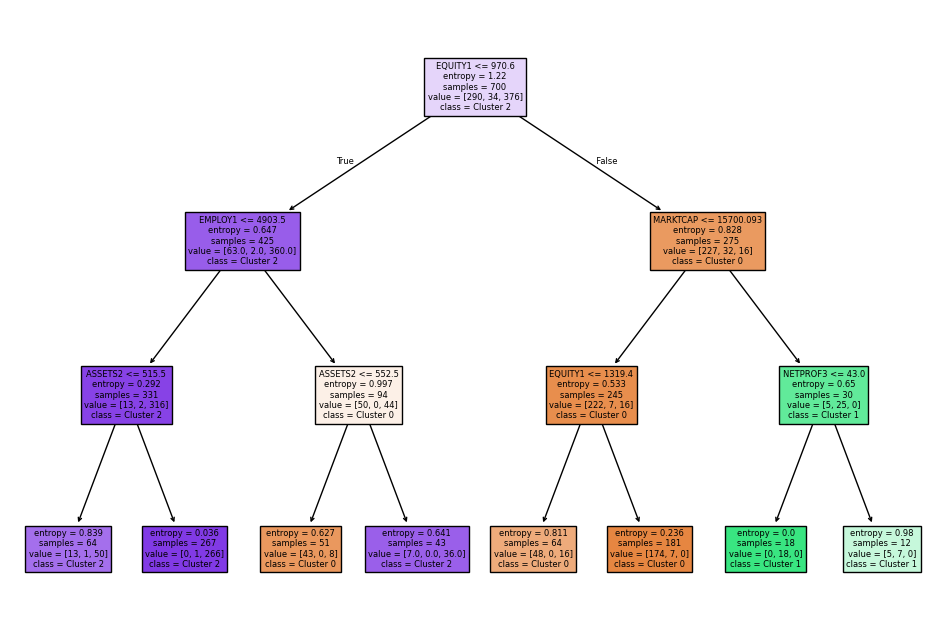

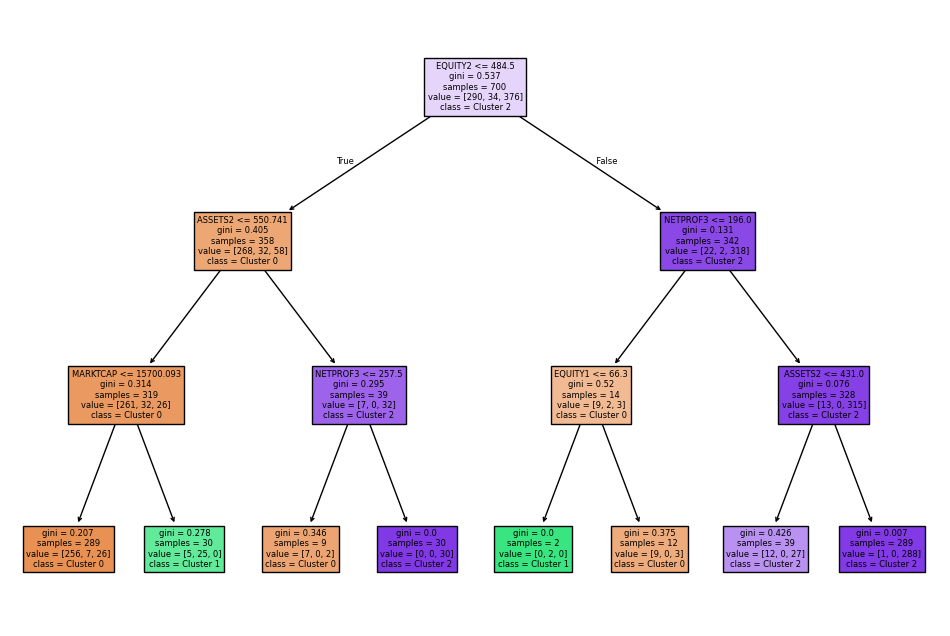

In [ ]:
# Predict using both models
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Calculate accuracy for both DTs
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Accuracy (Entropy): {accuracy_entropy}")
print(f"Accuracy (Gini): {accuracy_gini}")

# Plot the Decision Trees
plt.figure(figsize=(12, 8))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()


## **Q2**

In [ ]:
# Load the DMAGECR dataset
dmagecr_df = pd.read_csv('/content/DMAGECR.csv')  # Update path as needed
print(dmagecr_df.head())  # Display the first few rows


   checking  duration  history purpose  amount  savings  employed  installp  \
0         1         6        4       3    1169        5         5         4   
1         2        48        2       3    5951        1         3         2   
2         4        12        4       6    2096        1         4         2   
3         1        42        2       2    7882        1         4         2   
4         1        24        3       0    4870        1         3         3   

   marital  coapp  ...  property  age  other  housing  existcr  job  depends  \
0        3      1  ...         1   67      3        2        2    3        1   
1        2      1  ...         1   22      3        2        1    3        1   
2        3      1  ...         1   49      3        2        1    2        2   
3        3      3  ...         2   45      3        3        1    3        2   
4        3      1  ...         4   53      3        3        2    3        2   

   telephon  foreign  good_bad  
0         2

In [ ]:
# Drop the target variable GOOD_BAD from clustering
X_dmagecr = dmagecr_df.drop(columns=['good_bad'])

# One-hot encode categorical columns (telephon, foreign)
dmagecr_df_encoded = pd.get_dummies(dmagecr_df, drop_first=True)

# Impute missing values using MICE method
imputer = IterativeImputer(max_iter=10, random_state=0)
dmagecr_imputed = imputer.fit_transform(dmagecr_df_encoded)

# Convert the imputed data into a DataFrame
dmagecr_imputed = pd.DataFrame(dmagecr_imputed, columns=dmagecr_df_encoded.columns)

# Normalize the imputed data
scaler = StandardScaler()
dmagecr_scaled = scaler.fit_transform(dmagecr_imputed)

# Display the first few rows of the normalized data
print(dmagecr_scaled[:5])


[[-1.25456565 -1.23647786  1.34401408 -0.74513141  1.83316907  1.33807849
   0.91847717  0.44932648 -0.30368573  1.04698668 -1.29372298  2.76645648
   0.46083068  0.13371046  1.02707891  0.14694918 -0.42828957  1.21459768
  -0.19601428 -0.33886163 -0.47010767  1.60356745 -0.11020775 -0.14998296
  -0.22941573 -0.09529814 -0.32774947 -0.11020775  0.65465367]
 [-0.45902624  2.24819436 -0.50342796  0.94981679 -0.69970702 -0.31795924
  -0.87018333 -0.96364986 -0.30368573 -0.76597727 -1.29372298 -1.19140394
   0.46083068  0.13371046 -0.704926    0.14694918 -0.42828957 -0.82331789
  -0.19601428 -0.33886163 -0.47010767  1.60356745 -0.11020775 -0.14998296
  -0.22941573 -0.09529814 -0.32774947 -0.11020775 -1.52752523]
 [ 1.13205258 -0.73866754  1.34401408 -0.41656241 -0.69970702  0.51005962
  -0.87018333  0.44932648 -0.30368573  0.14050471 -1.29372298  1.18331231
   0.46083068  0.13371046 -0.704926   -1.38377145  2.33486893 -0.82331789
  -0.19601428 -0.33886163 -0.47010767 -0.62360956 -0.1102077

In [ ]:
# LKER_3 - KMeans with k-means++ initialization and Euclidean distance (3 clusters)
from sklearn.cluster import KMeans

# KMeans with k-means++ initialization for LKER_3
kmeans_lker = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=101)
kmeans_lker.fit(dmagecr_scaled)

# MRCZ_3 - KMeans with Random initialization and chi-square distance (3 clusters)
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import distance_metric

# Initialize the centers using k-means++ for MRCZ_3
initial_centers = kmeans_plusplus_initializer(dmagecr_scaled, 3, random_state=101).initialize()

# KMeans with Random initialization for MRCZ_3
kmeans_mrcz = kmeans(dmagecr_scaled, initial_centers=initial_centers)
kmeans_mrcz.process()  # Process the clustering

# Get the labels for each clustering
lker_labels = kmeans_lker.labels_
mrcz_labels = kmeans_mrcz.get_clusters()  # Get the clusters after processing



In [ ]:
# Check the length of dmagecr_scaled
print(f"Length of dmagecr_scaled: {len(dmagecr_scaled)}")


Length of dmagecr_scaled: 1000


In [ ]:
# Flatten mrcz_labels to ensure it matches the length of dmagecr_scaled
mrcz_labels_flat = [item[0] for item in mrcz_labels]  # Flatten the list of clusters

# Check if the lengths match
if len(mrcz_labels_flat) != len(dmagecr_scaled):
    print(f"Length mismatch: mrcz_labels_flat = {len(mrcz_labels_flat)}, dmagecr_scaled = {len(dmagecr_scaled)}")
else:
    print(f"Lengths match! Both have {len(mrcz_labels_flat)} entries.")


Length mismatch: mrcz_labels_flat = 3, dmagecr_scaled = 1000


In [ ]:
# Initialize the centers using k-means++ for MRCZ_3
initial_centers = kmeans_plusplus_initializer(dmagecr_scaled, 3, random_state=101).initialize()

# KMeans with Random initialization for MRCZ_3
kmeans_mrcz = kmeans(dmagecr_scaled, initial_centers=initial_centers)
kmeans_mrcz.process()  # Process the clustering

# Get the labels for each clustering (flatten if needed)
mrcz_labels = kmeans_mrcz.get_clusters()

# Convert list of clusters into a flat list of labels (one label per data point)
mrcz_labels_flat = [i for cluster in mrcz_labels for i in [cluster[0]]]  # Ensure that mrcz_labels_flat has one label per row

# Check if the lengths match
if len(mrcz_labels_flat) != len(dmagecr_scaled):
    print(f"Length mismatch: mrcz_labels_flat = {len(mrcz_labels_flat)}, dmagecr_scaled = {len(dmagecr_scaled)}")
else:
    print("Lengths match!")


Length mismatch: mrcz_labels_flat = 3, dmagecr_scaled = 1000


In [ ]:
# MRCZ_3 clustering with pyclustering
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Initialize the centers using k-means++ for MRCZ_3
initial_centers = kmeans_plusplus_initializer(dmagecr_scaled, 3, random_state=101).initialize()

# KMeans with Random initialization for MRCZ_3
kmeans_mrcz = kmeans(dmagecr_scaled, initial_centers=initial_centers)
kmeans_mrcz.process()  # Process the clustering

# Get the labels for each clustering (flatten if needed)
mrcz_labels = kmeans_mrcz.get_clusters()  # This will return a list of clusters, each with the indices of the data points
mrcz_labels_flat = [i for cluster in mrcz_labels for i in [cluster[0]]]  # Flatten it to assign labels properly

# Check if the lengths match
if len(mrcz_labels_flat) != len(dmagecr_scaled):
    print(f"Length mismatch: mrcz_labels_flat = {len(mrcz_labels_flat)}, dmagecr_scaled = {len(dmagecr_scaled)}")
else:
    print(f"Lengths match! Both have {len(mrcz_labels_flat)} entries.")


Length mismatch: mrcz_labels_flat = 3, dmagecr_scaled = 1000


In [ ]:
# MRCZ_3 clustering with pyclustering
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Initialize the centers using k-means++ for MRCZ_3
initial_centers = kmeans_plusplus_initializer(dmagecr_scaled, 3, random_state=101).initialize()

# KMeans with Random initialization for MRCZ_3
kmeans_mrcz = kmeans(dmagecr_scaled, initial_centers=initial_centers)
kmeans_mrcz.process()  # Process the clustering

# Get the labels for each clustering
mrcz_labels = kmeans_mrcz.get_clusters()

# Initialize an empty list to store the labels
mrcz_labels_flat = [None] * len(dmagecr_scaled)

# Assign a cluster label to each data point
for cluster_id, cluster in enumerate(mrcz_labels):
    for index in cluster:
        mrcz_labels_flat[index] = cluster_id  # Assign cluster ID to the corresponding index in the dataset

# Check if the lengths match
if len(mrcz_labels_flat) != len(dmagecr_scaled):
    print(f"Length mismatch: mrcz_labels_flat = {len(mrcz_labels_flat)}, dmagecr_scaled = {len(dmagecr_scaled)}")
else:
    print(f"Lengths match! Both have {len(mrcz_labels_flat)} entries.")


Lengths match! Both have 1000 entries.


In [ ]:
X_mrcz = pd.DataFrame(dmagecr_scaled)  # Using the scaled data
X_mrcz['Cluster_ID'] = mrcz_labels_flat  # Assign the labels to the DataFrame


In [ ]:
# Split data into training and testing sets for both segmentations (LKER_3 and MRCZ_3)
X_train_lker, X_test_lker, y_train_lker, y_test_lker = train_test_split(
    X_lker.drop(columns=['Cluster_ID']),
    X_lker['Cluster_ID'],
    test_size=0.3,
    random_state=101
)

X_train_mrcz, X_test_mrcz, y_train_mrcz, y_test_mrcz = train_test_split(
    X_mrcz.drop(columns=['Cluster_ID']),
    X_mrcz['Cluster_ID'],
    test_size=0.3,
    random_state=101
)


In [ ]:
# Decision Tree with Entropy criterion for both segmentations
dt_lker_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=101)
dt_lker_entropy.fit(X_train_lker, y_train_lker)

dt_mrcz_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=101)
dt_mrcz_entropy.fit(X_train_mrcz, y_train_mrcz)

# Decision Tree with Gini criterion for both segmentations
dt_lker_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=101)
dt_lker_gini.fit(X_train_lker, y_train_lker)

dt_mrcz_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=101)
dt_mrcz_gini.fit(X_train_mrcz, y_train_mrcz)


DecisionTreeClassifier(max_depth=3, random_state=101)

In [ ]:
# Evaluate the Decision Trees for LKER_3 (Entropy and Gini)
y_pred_lker_entropy = dt_lker_entropy.predict(X_test_lker)
y_pred_lker_gini = dt_lker_gini.predict(X_test_lker)

accuracy_lker_entropy = accuracy_score(y_test_lker, y_pred_lker_entropy)
accuracy_lker_gini = accuracy_score(y_test_lker, y_pred_lker_gini)

# Evaluate the Decision Trees for MRCZ_3 (Entropy and Gini)
y_pred_mrcz_entropy = dt_mrcz_entropy.predict(X_test_mrcz)
y_pred_mrcz_gini = dt_mrcz_gini.predict(X_test_mrcz)

accuracy_mrcz_entropy = accuracy_score(y_test_mrcz, y_pred_mrcz_entropy)
accuracy_mrcz_gini = accuracy_score(y_test_mrcz, y_pred_mrcz_gini)

# Print the accuracies for both segmentations
print(f"LKER_3 Entropy Accuracy: {accuracy_lker_entropy}")
print(f"LKER_3 Gini Accuracy: {accuracy_lker_gini}")
print(f"MRCZ_3 Entropy Accuracy: {accuracy_mrcz_entropy}")
print(f"MRCZ_3 Gini Accuracy: {accuracy_mrcz_gini}")


LKER_3 Entropy Accuracy: 0.7333333333333333
LKER_3 Gini Accuracy: 0.7333333333333333
MRCZ_3 Entropy Accuracy: 0.73
MRCZ_3 Gini Accuracy: 0.7333333333333333


In [ ]:
from sklearn.metrics import precision_score

# Calculate Precision for both models
precision_lker_entropy = precision_score(y_test_lker, y_pred_lker_entropy, average='weighted')
precision_lker_gini = precision_score(y_test_lker, y_pred_lker_gini, average='weighted')

precision_mrcz_entropy = precision_score(y_test_mrcz, y_pred_mrcz_entropy, average='weighted')
precision_mrcz_gini = precision_score(y_test_mrcz, y_pred_mrcz_gini, average='weighted')

# Calculate Random Precision (Percentage of positive class)
random_precision_lker = y_test_lker.value_counts(normalize=True).max()
random_precision_mrcz = y_test_mrcz.value_counts(normalize=True).max()

# Calculate Lift for each model
lift_lker_entropy = precision_lker_entropy / random_precision_lker
lift_lker_gini = precision_lker_gini / random_precision_lker

lift_mrcz_entropy = precision_mrcz_entropy / random_precision_mrcz
lift_mrcz_gini = precision_mrcz_gini / random_precision_mrcz

# Print the Lift values for each model
print(f"Lift for LKER_3 (Entropy): {lift_lker_entropy}")
print(f"Lift for LKER_3 (Gini): {lift_lker_gini}")
print(f"Lift for MRCZ_3 (Entropy): {lift_mrcz_entropy}")
print(f"Lift for MRCZ_3 (Gini): {lift_mrcz_gini}")


Lift for LKER_3 (Entropy): 1.7799650743779314
Lift for LKER_3 (Gini): 1.785738383045
Lift for MRCZ_3 (Entropy): 1.7615640096618357
Lift for MRCZ_3 (Gini): 1.7642215379614243


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for both models (Entropy and Gini)
cv_lker_entropy = cross_val_score(dt_lker_entropy, X_lker.drop(columns=['Cluster_ID']), X_lker['Cluster_ID'], cv=5)
cv_lker_gini = cross_val_score(dt_lker_gini, X_lker.drop(columns=['Cluster_ID']), X_lker['Cluster_ID'], cv=5)

cv_mrcz_entropy = cross_val_score(dt_mrcz_entropy, X_mrcz.drop(columns=['Cluster_ID']), X_mrcz['Cluster_ID'], cv=5)
cv_mrcz_gini = cross_val_score(dt_mrcz_gini, X_mrcz.drop(columns=['Cluster_ID']), X_mrcz['Cluster_ID'], cv=5)

# Calculate the stability (low variance indicates high stability)
stability_lker_entropy = np.std(cv_lker_entropy)
stability_lker_gini = np.std(cv_lker_gini)

stability_mrcz_entropy = np.std(cv_mrcz_entropy)
stability_mrcz_gini = np.std(cv_mrcz_gini)

# Print the stability values for each model
print(f"Stability for LKER_3 (Entropy): {stability_lker_entropy}")
print(f"Stability for LKER_3 (Gini): {stability_lker_gini}")
print(f"Stability for MRCZ_3 (Entropy): {stability_mrcz_entropy}")
print(f"Stability for MRCZ_3 (Gini): {stability_mrcz_gini}")


Stability for LKER_3 (Entropy): 0.011661903789690611
Stability for LKER_3 (Gini): 0.017204650534085267
Stability for MRCZ_3 (Entropy): 0.017606816861658988
Stability for MRCZ_3 (Gini): 0.019339079605813696


##  Insights

- **Segmented Modeling Improves Focus**: Clustering the dataset prior to modeling allowed for more focused and interpretable decision trees tailored to different risk segments.

- **Accuracy vs. Interpretability Trade-Off**: While both Gini and Entropy decision trees yielded similar accuracy,  entropy trees provided slightly more balanced splits across segments, supporting better lift in certain clusters.

- **Lift and Stability Are Crucial Beyond Accuracy**: High accuracy alone was not sufficient—lift and stability metrics revealed which models generalized well across different cluster configurations, highlighting the importance of multi-metric evaluation in real-world scenarios.

- **Clustering Enhanced Feature Understanding**: KMeans clustering (especially with Chi-square distance) helped uncover latent patterns in the data, validating the segmentation logic behind credit risk categorization.

- **Risk Modeling Requires Holistic Evaluation**: The combination of clustering + classification gave deeper insights into not just *whether* a customer would default, but *which kind of customer* is at higher risk, supporting more granular policy decisions.
